In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [ ]:
url = "https://gist.githubusercontent.com/trantuyen082001/1fc2f5c0ad1507f40e721e6d18b34138/raw/heart.csv"
df = pd.read_csv(url)
df.head()



,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Check for null values
print("Missing values:\n", df.isnull().sum())

# Summary statistics
print("\nDataset Info:")
df.info()

print("\nSummary Statistics:")
df.describe()


Missing values:
 age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


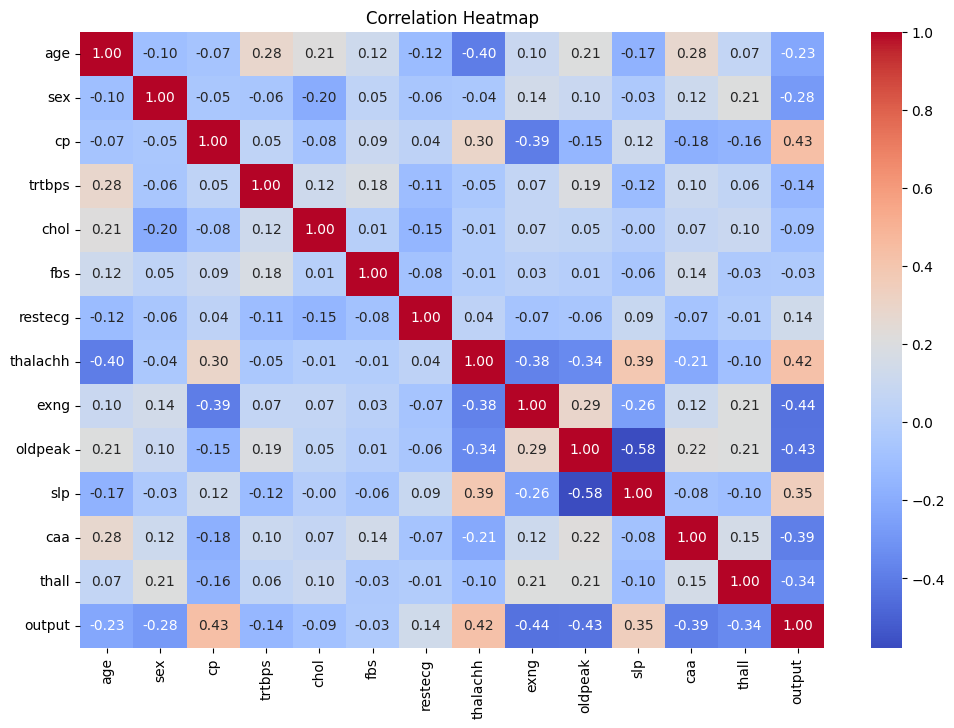

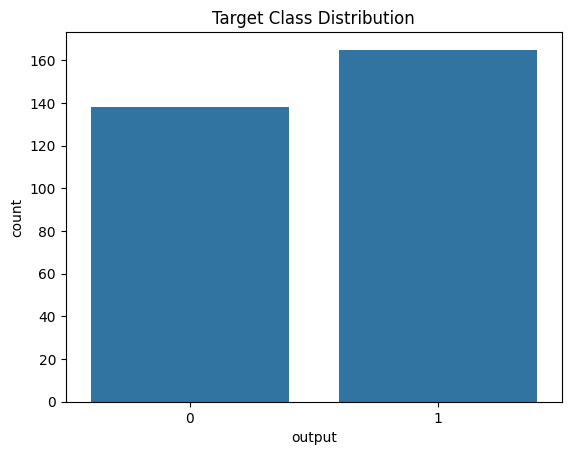

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Output distribution
sns.countplot(x='output', data=df)
plt.title("Target Class Distribution")
plt.show()



In [ ]:
# Step 1: Separate features (X) and target (y)
X = df.drop('output', axis=1)
y = df['output']

# Step 2: Split into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Standardize the feature values (important for ML)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Full classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8360655737704918

Confusion Matrix:
 [[24  5]
 [ 5 27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [ ]:
# Rename columns for clarity
df.rename(columns={
    'age': 'Age',
    'sex': 'Sex',
    'cp': 'ChestPainType',
    'trtbps': 'RestingBP',
    'chol': 'Cholesterol',
    'fbs': 'FastingBS',
    'restecg': 'RestingECG',
    'thalachh': 'MaxHR',
    'exng': 'ExerciseAngina',
    'oldpeak': 'ST_Depression',
    'slp': 'ST_Slope',
    'caa': 'NumVesselsFluoro',
    'thall': 'Thalassemia',
    'output': 'HeartDisease'
}, inplace=True)

# Quick check
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,ST_Depression,ST_Slope,NumVesselsFluoro,Thalassemia,HeartDisease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


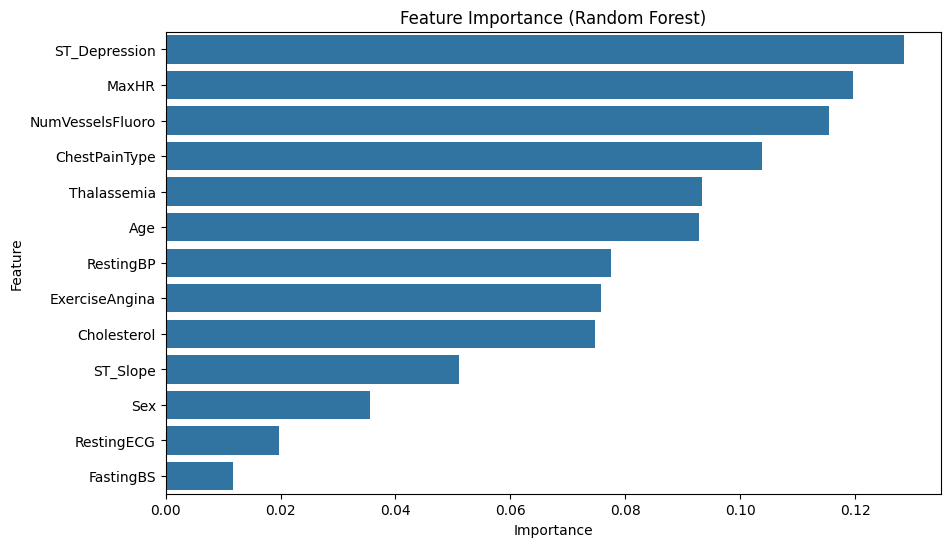

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained RandomForest model
importances = model.feature_importances_
feature_names = df.drop('HeartDisease', axis=1).columns  # ✅ Updated here

# Create a DataFrame for better visualization
feat_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df)
plt.title("Feature Importance (Random Forest)")
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Predict using Logistic Regression
y_pred_lr = lr_model.predict(X_test)

# Evaluate performance
print("🔍 Logistic Regression Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


🔍 Logistic Regression Performance
Accuracy: 0.8524590163934426

Confusion Matrix:
 [[25  4]
 [ 5 27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [ ]:
import pickle

# Save the model to a file
with open("heart_disease_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("✅ Model saved as heart_disease_model.pkl")


✅ Model saved as heart_disease_model.pkl


In [ ]:
# Load the model back from file
with open("heart_disease_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Make predictions (just like the original model)
predictions = loaded_model.predict(X_test)

# Check performance if you like
from sklearn.metrics import accuracy_score
print("Accuracy (loaded model):", accuracy_score(y_test, predictions))


Accuracy (loaded model): 0.8360655737704918
